In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("received_messages 1.csv")
df.drop(df.loc[df.Material.isin(['<unknown>', 'Water25Gelatin75'])].index, axis=0, inplace=True)
df.loc[df.Material=='Water25gelatin75', "Material"] = 'Water25Gelatin75'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

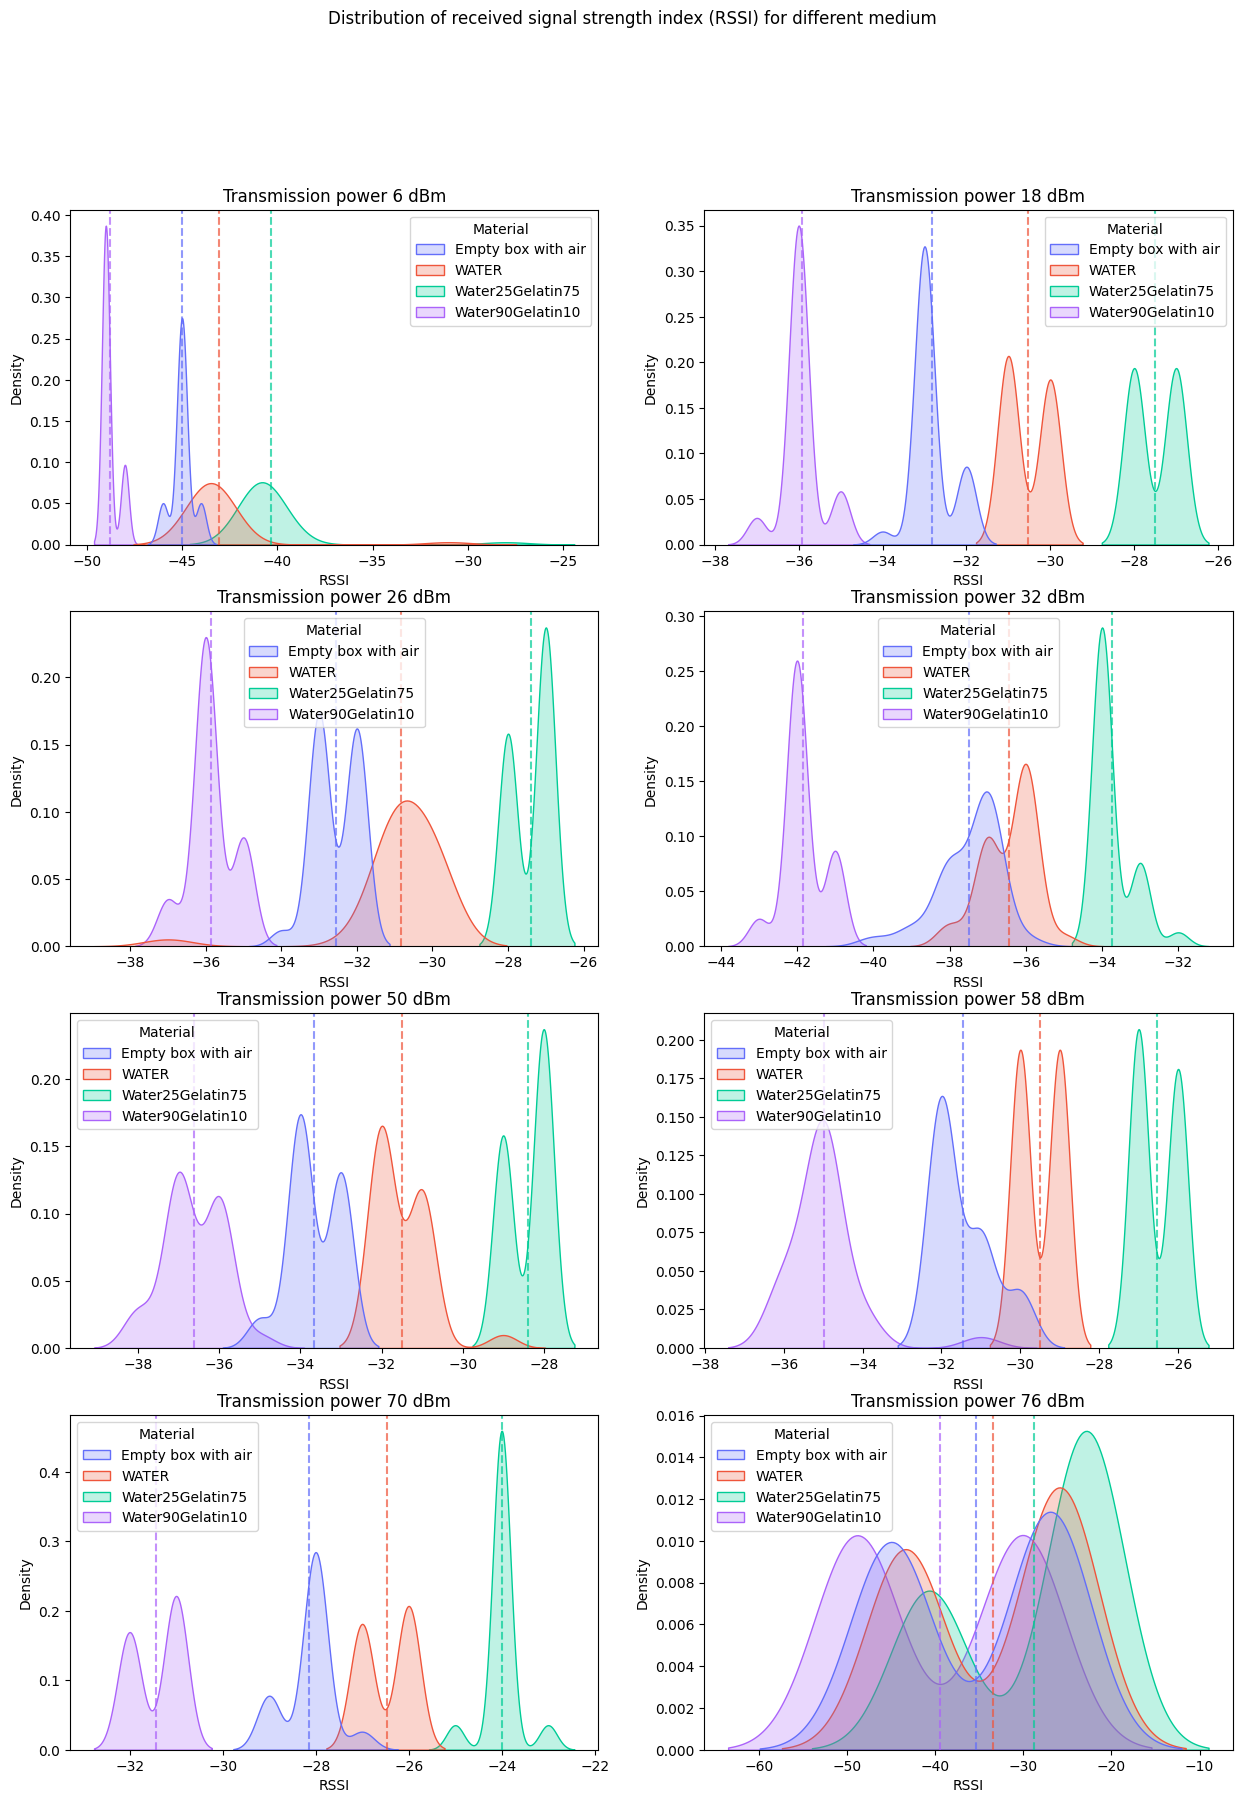

In [4]:
powerLevels = df.TxPower.sort_values().unique()
materials = df.Material.sort_values().unique()
custom_palette = ["#636efa", "#ef553b", "#00cc96", "#ab63fa"]

def distplots(value_col, title):
    # Create subplots
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    axes = axes.flatten()
    plt.suptitle(title)

    for i, power in enumerate(powerLevels):
        tdf = df.loc[df.TxPower == power]
        sns.kdeplot(ax=axes[i], data=tdf, x=value_col, hue="Material", fill='layer', 
                    palette=custom_palette, hue_order=materials)
        axes[i].set_title(f'Transmission power {power} dBm')

        for mat,color in zip(materials,custom_palette):
            median = df.loc[(df.TxPower == power) & (df.Material == mat), value_col].mean()
            axes[i].axvline(median, linestyle='--', label=f'Median {median}', alpha=0.7, color=color)

distplots("RSSI", "Distribution of received signal strength index (RSSI) for different medium")

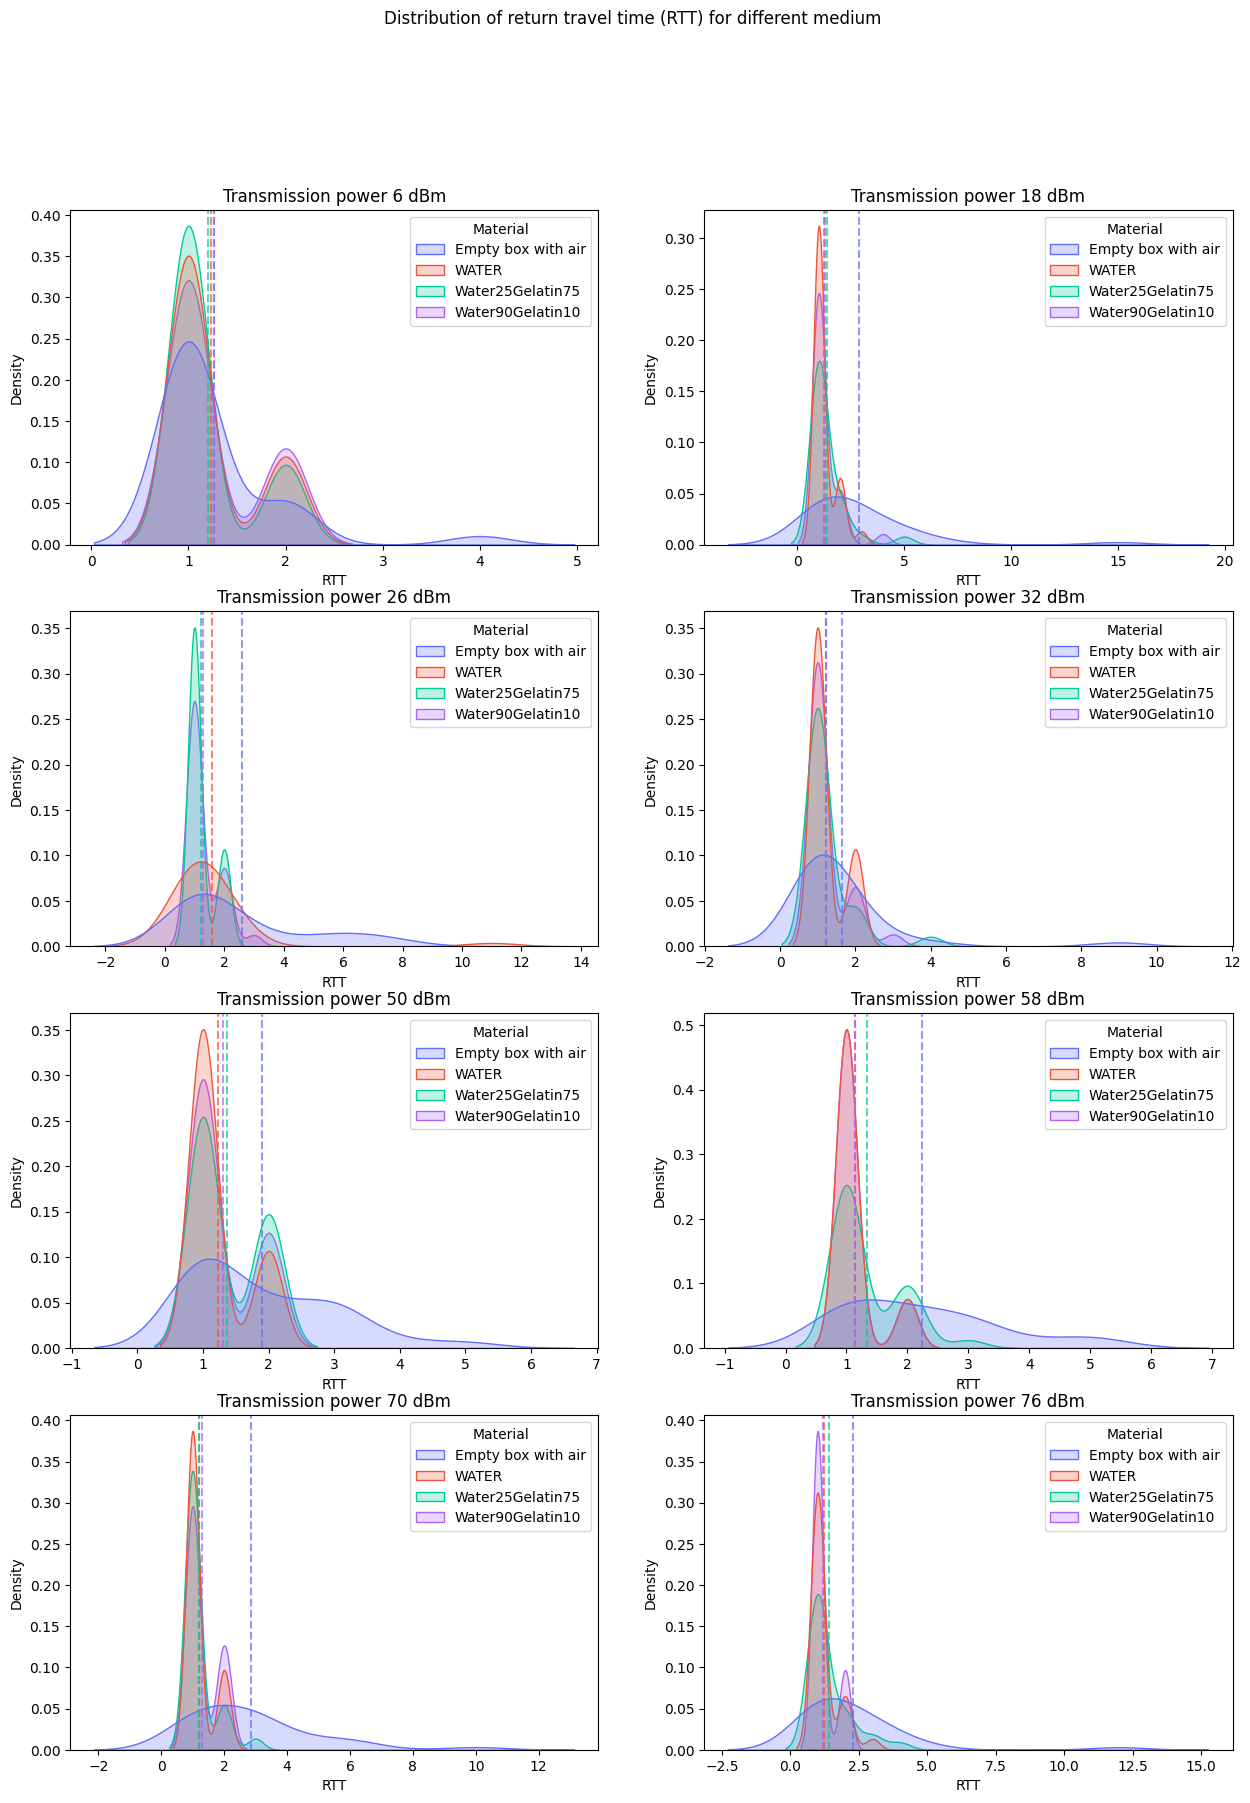

In [5]:
distplots("RTT", "Distribution of return travel time (RTT) for different medium")